
 Original input images:


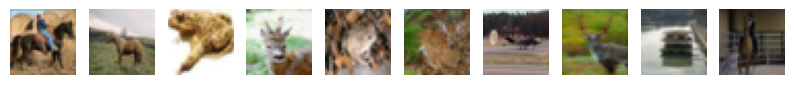

In [117]:
import numpy as np
import matplotlib.pyplot as plt



# 载入图像数据
R = np.load('/Users/jichanglong/Desktop/hssp_new/expdata/true_fl/cifar10/truefl/images_epoch_3_batch_0.npy')

# 将图像像素值从[-1, 1]缩放和偏移到[0,1]的范围
R = (R + 1.0) / 2.0

# 将像素值缩放到[0,255]的范围
R = (R * 255.0).astype(np.uint8)

# 转置维度，以便图像数据变为(batch_size, height, width, channels)
R = np.transpose(R, (0, 2, 3, 1))


#R=np.random.shuffle(R)
#print(R[0,:])
n=10
#idx=matrix()

import matplotlib.pyplot as plt
num_col = 10
num_row = int(n/num_col)
num_samples = num_row*num_col
shape= (32,32,3)
fig, axes = plt.subplots(num_row, num_col, figsize=(1.*num_col,1.*num_row))
print('\n Original input images:')
for i, ax in enumerate(axes.flat):
      ax.set_axis_off()
      ax.imshow(R[i].reshape(shape), cmap='gray') 
#plt.savefig("results//fl//ori.png")

In [6]:
import re

def extract_accuracy(filename):
    # Read the file
    with open(filename, 'r') as file:
        data = file.read()

    # Extract all "Accuracy" values and convert percentage to decimal
    test_accuracy_values = re.findall(r'Accuracy: (\d+)/10000', data)
    test_accuracy_values = [int(value) / 10000 for value in test_accuracy_values]
    
    train_accuracy_values = re.findall(r'Accuracy: (\d+)/60000', data)
    train_accuracy_values = [int(value) / 60000 for value in train_accuracy_values]
    
    return test_accuracy_values,train_accuracy_values

# Usage
test, train = extract_accuracy('/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/mnist_acc/untitled.txt')


[0.9519, 0.9671, 0.9725, 0.9757, 0.9774, 0.9784, 0.9786, 0.9791, 0.9794, 0.979, 0.9799, 0.98, 0.9803, 0.9813, 0.9826, 0.9827, 0.983, 0.9829, 0.9832, 0.9834, 0.9833, 0.9831, 0.9831, 0.9831, 0.9831, 0.9829, 0.983, 0.9828, 0.9829, 0.983, 0.9832, 0.9832, 0.9832, 0.9832, 0.9832, 0.9832, 0.9832, 0.9832, 0.9832, 0.9832, 0.9832, 0.9832, 0.9832, 0.9832, 0.9831, 0.9831, 0.9831, 0.9831, 0.9831, 0.9831, 0.9831, 0.9831, 0.983, 0.983, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.983, 0.9829, 0.983, 0.983, 0.983, 0.983, 0.983, 0.9829, 0.983, 0.9829, 0.983, 0.983, 0.983, 0.983, 0.983, 0.9829, 0.9829, 0.9829, 0.983, 0.9829, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.9829, 0.9829, 0.9829, 0.9828, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9829, 0.9828, 0.9828, 0.9828, 0.9828, 0.9828, 

(10, 500)


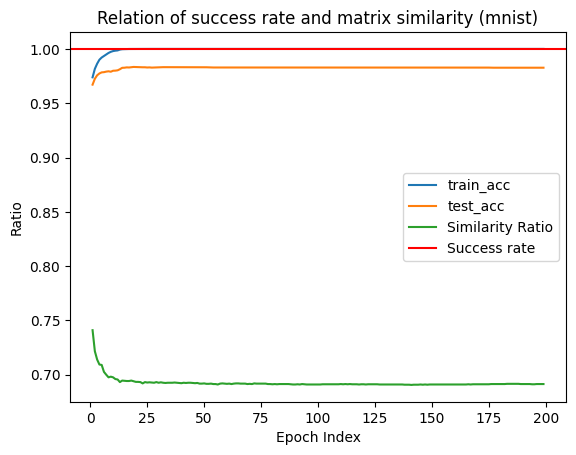

In [17]:
import re

def extract_accuracy(filename):
    # Read the file
    with open(filename, 'r') as file:
        data = file.read()

    # Extract all "Accuracy" values and convert percentage to decimal
    test_accuracy_values = re.findall(r'Accuracy: (\d+)/10000', data)
    test_accuracy_values = [int(value) / 10000 for value in test_accuracy_values]
    
    train_accuracy_values = re.findall(r'Accuracy: (\d+)/60000', data)
    train_accuracy_values = [int(value) / 60000 for value in train_accuracy_values]
    
    return test_accuracy_values,train_accuracy_values

# Usage
test, train = extract_accuracy('/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/mnist_acc/untitled.txt')


import numpy as np
import matplotlib.pyplot as plt

# 载入第一个矩阵
first_matrix = np.load('/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/mnist/initial_activation.npy')

print(first_matrix.shape)
# 计算第一个矩阵中0的位置和总数
zero_mask = (first_matrix == 0)
zero_count = np.sum(zero_mask)

# 计算第一个矩阵中1的位置和总数
one_mask = (first_matrix == 1)
one_count = np.sum(one_mask)

# 初始化列表来存储每个矩阵的比例
ratios = []
zero_percent_ratios = []
one_unchanged_ratios = []
similarity_ratios = []  # 新增相

epochs = 200
# 循环载入其余的矩阵
for i in range(1, epochs):
    matrix_path = f'/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/mnist/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    #matrix_path = f'/Users/jichanglong/Desktop/hssp_new/expdata/initialization_purchase_cifar/cifar/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    
    matrix = np.load(matrix_path)
    
    # 计算在原矩阵0的位置上仍为0的数量
    unchanged_zeros = np.sum(zero_mask & (matrix == 0))
    ratio = unchanged_zeros / zero_count
    ratios.append(ratio)

    # 计算0占总数的百分比
    total_elements = np.prod(matrix.shape)  # 总元素数量
    zeros = np.sum(matrix == 0)
    zero_percent_ratio = zeros / total_elements
    zero_percent_ratios.append(zero_percent_ratio)
    
    # 计算1的位置不变的个数占初始矩阵的1的个数的比例
    unchanged_ones = np.sum(one_mask & (matrix == 1))
    one_unchanged_ratio = unchanged_ones / one_count
    one_unchanged_ratios.append(one_unchanged_ratio)
    
    # 计算矩阵与初始矩阵的相似度
    difference = np.abs(matrix - first_matrix)
    total_difference = np.sum(difference)
    similarity_ratio = 1 - total_difference / total_elements
    similarity_ratios.append(similarity_ratio)

# 创建图形和轴
fig, ax = plt.subplots()
x_values = list(range(1, epochs))
average_ratio = sum(ratios) / len(ratios)

# 绘制三条线
ax.plot(x_values, train[1:], label='train_acc')
ax.plot(x_values, test[1:], label='test_acc')
ax.plot(x_values, similarity_ratios, label='Similarity Ratio')
ax.axhline(y=1, color='r', linestyle='-',  label='Success rate')  # 添加恒为1的线
#ax.plot(x_values, accuracy_list[1:], label='Acc')

# 绘制平均值线
# ax.axhline(y=average_ratio, color='r', linestyle='--', label='Average Ratio of Unchanged Zeros')

# 设置标题和标签
ax.set_title('Relation of success rate and matrix similarity (mnist)')
ax.set_xlabel('Epoch Index')
ax.set_ylabel('Ratio')

# 添加图例
ax.legend()

# 显示图形
plt.show()




(10, 1024)


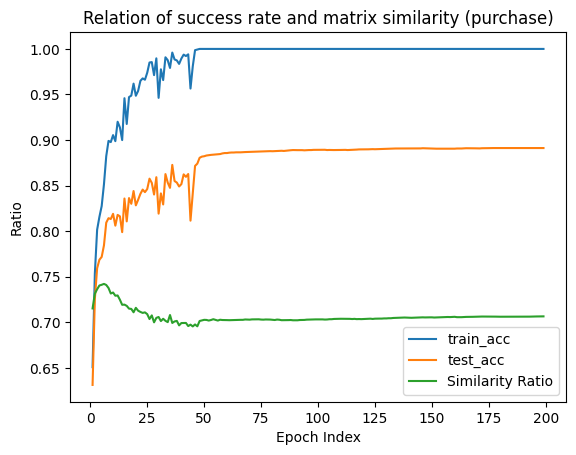

In [4]:
#这是purchase

import re

def extract_accuracy(filename):
    # Read the file
    with open(filename, 'r') as file:
        data = file.read()

    # Extract all "Accuracy" values and convert percentage to decimal
    test_accuracy_values = re.findall(r'Accuracy: (\d+)/10000', data)
    test_accuracy_values = [int(value) / 10000 for value in test_accuracy_values]
    
    train_accuracy_values = re.findall(r'Accuracy: (\d+)/50000', data)
    train_accuracy_values = [int(value) / 50000 for value in train_accuracy_values]
    
    return test_accuracy_values,train_accuracy_values

# Usage
test, train = extract_accuracy('/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/purchase_acc/untitled.txt')


import numpy as np
import matplotlib.pyplot as plt

# 载入第一个矩阵
first_matrix = np.load('/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/purchase/initial_activation.npy')

print(first_matrix.shape)
# 计算第一个矩阵中0的位置和总数
zero_mask = (first_matrix == 0)
zero_count = np.sum(zero_mask)

# 计算第一个矩阵中1的位置和总数
one_mask = (first_matrix == 1)
one_count = np.sum(one_mask)

# 初始化列表来存储每个矩阵的比例
ratios = []
zero_percent_ratios = []
one_unchanged_ratios = []
similarity_ratios = []  # 新增相

epochs = 200
# 循环载入其余的矩阵
for i in range(1, epochs):
    matrix_path = f'/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/purchase/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    #matrix_path = f'/Users/jichanglong/Desktop/hssp_new/expdata/initialization_purchase_cifar/cifar/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    
    matrix = np.load(matrix_path)
    
    # 计算在原矩阵0的位置上仍为0的数量
    unchanged_zeros = np.sum(zero_mask & (matrix == 0))
    ratio = unchanged_zeros / zero_count
    ratios.append(ratio)

    # 计算0占总数的百分比
    total_elements = np.prod(matrix.shape)  # 总元素数量
    zeros = np.sum(matrix == 0)
    zero_percent_ratio = zeros / total_elements
    zero_percent_ratios.append(zero_percent_ratio)
    
    # 计算1的位置不变的个数占初始矩阵的1的个数的比例
    unchanged_ones = np.sum(one_mask & (matrix == 1))
    one_unchanged_ratio = unchanged_ones / one_count
    one_unchanged_ratios.append(one_unchanged_ratio)
    
    # 计算矩阵与初始矩阵的相似度
    difference = np.abs(matrix - first_matrix)
    total_difference = np.sum(difference)
    similarity_ratio = 1 - total_difference / total_elements
    similarity_ratios.append(similarity_ratio)

    

# 创建图形和轴
fig, ax = plt.subplots()
x_values = list(range(1, epochs))
average_ratio = sum(ratios) / len(ratios)

# 绘制三条线
ax.plot(x_values, train[1:], label='train_acc')
ax.plot(x_values, test[1:], label='test_acc')
ax.plot(x_values, similarity_ratios, label='Similarity Ratio')
#ax.axhline(y=1, color='r', linestyle='-',  label='Success rate')  # 添加恒为1的线
#ax.plot(x_values, accuracy_list[1:], label='Acc')

# 绘制平均值线
# ax.axhline(y=average_ratio, color='r', linestyle='--', label='Average Ratio of Unchanged Zeros')

# 设置标题和标签
ax.set_title('Relation of success rate and matrix similarity (purchase)')
ax.set_xlabel('Epoch Index')
ax.set_ylabel('Ratio')

# 添加图例
ax.legend()

# 显示图形
plt.show()




(10, 1024)


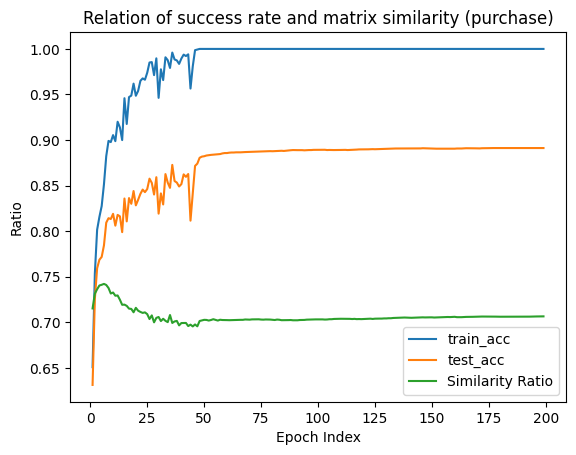

In [2]:
#这是purchase的备份

import re

def extract_accuracy(filename):
    # Read the file
    with open(filename, 'r') as file:
        data = file.read()

    # Extract all "Accuracy" values and convert percentage to decimal
    test_accuracy_values = re.findall(r'Accuracy: (\d+)/10000', data)
    test_accuracy_values = [int(value) / 10000 for value in test_accuracy_values]
    
    train_accuracy_values = re.findall(r'Accuracy: (\d+)/50000', data)
    train_accuracy_values = [int(value) / 50000 for value in train_accuracy_values]
    
    return test_accuracy_values,train_accuracy_values

# Usage
test, train = extract_accuracy('/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/purchase_acc/untitled.txt')


import numpy as np
import matplotlib.pyplot as plt

# 载入第一个矩阵
first_matrix = np.load('/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/purchase/initial_activation.npy')

print(first_matrix.shape)
# 计算第一个矩阵中0的位置和总数
zero_mask = (first_matrix == 0)
zero_count = np.sum(zero_mask)

# 计算第一个矩阵中1的位置和总数
one_mask = (first_matrix == 1)
one_count = np.sum(one_mask)

# 初始化列表来存储每个矩阵的比例
ratios = []
zero_percent_ratios = []
one_unchanged_ratios = []
similarity_ratios = []  # 新增相

epochs = 200
# 循环载入其余的矩阵
for i in range(1, epochs):
    matrix_path = f'/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/purchase/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    #matrix_path = f'/Users/jichanglong/Desktop/hssp_new/expdata/initialization_purchase_cifar/cifar/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    
    matrix = np.load(matrix_path)
    
    # 计算在原矩阵0的位置上仍为0的数量
    unchanged_zeros = np.sum(zero_mask & (matrix == 0))
    ratio = unchanged_zeros / zero_count
    ratios.append(ratio)

    # 计算0占总数的百分比
    total_elements = np.prod(matrix.shape)  # 总元素数量
    zeros = np.sum(matrix == 0)
    zero_percent_ratio = zeros / total_elements
    zero_percent_ratios.append(zero_percent_ratio)
    
    # 计算1的位置不变的个数占初始矩阵的1的个数的比例
    unchanged_ones = np.sum(one_mask & (matrix == 1))
    one_unchanged_ratio = unchanged_ones / one_count
    one_unchanged_ratios.append(one_unchanged_ratio)
    
    # 计算矩阵与初始矩阵的相似度
    difference = np.abs(matrix - first_matrix)
    total_difference = np.sum(difference)
    similarity_ratio = 1 - total_difference / total_elements
    similarity_ratios.append(similarity_ratio)

    
x_values = list(range(1, epochs))
marker_size = 11
# Plot lines with the new styles and markers
ax.plot(x_values, ns, label='NS attack', color='green', linestyle='--', marker='*', linewidth=2,markersize=marker_size)

#ax.plot(x_values, multi, label='Multivariate attack', color='blue', linestyle='--', marker='o', linewidth=2,markersize=marker_size)
#ax.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2,markersize=marker_size)

# Add grid lines
ax.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax.set_xlabel('Subsample size:  m', fontsize=12)
ax.set_ylabel('Running time /s', fontsize=12)

# Set the legend to match the style in the second plot
#legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
legend = ax.legend(frameon=True, loc='lower right', fontsize=12)
# Set the title if necessary
#ax.set_title('Running time as a function of m')

# Show the plot with tight layout to ensure the legend is placed correctly
plt.tight_layout()

# 保存为PDF格式
plt.savefig('running_time_ns.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('running_time_ns.png', bbox_inches='tight')

plt.show()

# 创建图形和轴
fig, ax = plt.subplots()
x_values = list(range(1, epochs))
average_ratio = sum(ratios) / len(ratios)

# 绘制三条线
ax.plot(x_values, train[1:], label='train_acc')
ax.plot(x_values, test[1:], label='test_acc')
ax.plot(x_values, similarity_ratios, label='Similarity Ratio')
#ax.axhline(y=1, color='r', linestyle='-',  label='Success rate')  # 添加恒为1的线
#ax.plot(x_values, accuracy_list[1:], label='Acc')

# 绘制平均值线
# ax.axhline(y=average_ratio, color='r', linestyle='--', label='Average Ratio of Unchanged Zeros')

# 设置标题和标签
ax.set_title('Relation of success rate and matrix similarity (purchase)')
ax.set_xlabel('Epoch Index')
ax.set_ylabel('Ratio')

# 添加图例
ax.legend()

# 显示图形
plt.show()




In [28]:
filename = '/Users/jichanglong/Desktop/hssp_new/comparisonData/data_m_times/docu_1.txt'
with open(filename, 'r') as file:
    content = file.read()

# Since the file content is structured with colons and commas, we'll parse it accordingly.
# First, we split the text into lines
lines = content.strip().split('\n')

# Then we parse each line into a dictionary
data = []
for line in lines:
    # Skip empty lines
    if not line.strip():
        continue

    # Split the line by commas first
    parts = line.split(', ')

    # Create a dictionary for each part, splitting by the first colon
    entry = {}
    for part in parts:
        key, value = part.split(': ', 1)

        # If 'Error' is not '0', set 'Time', 'NFound', and 'Coef' as None
        if key == 'Error' and value != '0':
            entry['Time'] = None
            entry['NFound'] = None
            entry['Coef'] = None

        entry[key] = value if key not in ['Time', 'NFound', 'Coef'] else entry.get(key, value)

    data.append(entry)
filtered_data = [entry for entry in data if entry['Error'] == '0']

print(filtered_data)

[{'Round': '1', 'Attack Type': 'NS Attack', 'Error': '0', 'Time': '0.10546398162841797', 'NFound': '10', 'Coef': '10'}, {'Round': '1', 'Attack Type': 'Multi Attack', 'Error': '0', 'Time': '0.0771939754486084', 'NFound': '10', 'Coef': '10'}, {'Round': '1', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.06459379196166992', 'NFound': '10', 'Coef': '10'}, {'Round': '2', 'Attack Type': 'NS Attack', 'Error': '0', 'Time': '0.30550289154052734', 'NFound': '10', 'Coef': '10'}, {'Round': '2', 'Attack Type': 'Multi Attack', 'Error': '0', 'Time': '0.12373781204223633', 'NFound': '10', 'Coef': '10'}, {'Round': '2', 'Attack Type': 'Statistical Attack', 'Error': '0', 'Time': '0.07037019729614258', 'NFound': '10', 'Coef': '10'}, {'Round': '3', 'Attack Type': 'NS Attack', 'Error': '0', 'Time': '0.6748590469360352', 'NFound': '10', 'Coef': '10'}, {'Round': '3', 'Attack Type': 'Multi Attack', 'Time': None, 'NFound': None, 'Coef': None, 'Error': "Exception: 'sage.rings.integer.Integer' obje

In [31]:
filtered_data

[{'Round': '1',
  'Attack Type': 'NS Attack',
  'Error': '0',
  'Time': '0.10546398162841797',
  'NFound': '10',
  'Coef': '10'},
 {'Round': '1',
  'Attack Type': 'Multi Attack',
  'Error': '0',
  'Time': '0.0771939754486084',
  'NFound': '10',
  'Coef': '10'},
 {'Round': '1',
  'Attack Type': 'Statistical Attack',
  'Error': '0',
  'Time': '0.06459379196166992',
  'NFound': '10',
  'Coef': '10'},
 {'Round': '2',
  'Attack Type': 'NS Attack',
  'Error': '0',
  'Time': '0.30550289154052734',
  'NFound': '10',
  'Coef': '10'},
 {'Round': '2',
  'Attack Type': 'Multi Attack',
  'Error': '0',
  'Time': '0.12373781204223633',
  'NFound': '10',
  'Coef': '10'},
 {'Round': '2',
  'Attack Type': 'Statistical Attack',
  'Error': '0',
  'Time': '0.07037019729614258',
  'NFound': '10',
  'Coef': '10'},
 {'Round': '3',
  'Attack Type': 'NS Attack',
  'Error': '0',
  'Time': '0.6748590469360352',
  'NFound': '10',
  'Coef': '10'},
 {'Round': '4',
  'Attack Type': 'NS Attack',
  'Error': '0',
  'Tim

In [27]:
filtered_data = {}

for round_info, attack_type, time in data:
    if "Error" not in time:
        round_number = int(round_info.split()[1])
        if round_number not in filtered_data:
            filtered_data[round_number] = {}
        filtered_data[round_number][attack_type] = float(time)

filtered_data

ValueError: too many values to unpack (expected 3)

In [6]:
# Define the base path where the files are located
base_path = '/Users/jichanglong/Desktop/hssp_new/comparisonData/data_m_times/'

# Prepare to store the filtered data from all files
all_filtered_data = []

# Loop through each file from docu_1.txt to docu_30.txt
for i in range(1, 51):
    filename = f'{base_path}docu_{i}.txt'
    
    with open(filename, 'r') as file:
        content = file.read()

    # Split the text into lines
    lines = content.strip().split('\n')

    # Parse each line into a dictionary
    data = []
    for line in lines:
        if not line.strip():
            continue

        parts = line.split(', ')
        entry = {}
        for part in parts:
            key, value = part.split(': ', 1)

            # Set 'Time', 'NFound', and 'Coef' as None if 'Error' is not '0'
            if key == 'Error' and value != '0':
                entry['Time'] = None
                entry['NFound'] = None
                entry['Coef'] = None

            entry[key] = value if key not in ['Time', 'NFound', 'Coef'] else entry.get(key, value)

        data.append(entry)

    # Filter the data for entries where 'Error' is '0'
    filtered_data = [entry for entry in data if entry['Error'] == '0']
    
    # Append the filtered data for this file to the list
    all_filtered_data.append(filtered_data)

# Optionally, you can print or further process all_filtered_data
# For example, to print the filtered data from each file:
# for index, file_data in enumerate(all_filtered_data, 1):
#     print(f"Filtered data from docu_{index}.txt:")
#     for entry in file_data:
#         print(entry)

        
from collections import defaultdict
import json

# This structure will store the total time and count for each (Round, Attack Type)
stats = defaultdict(lambda: defaultdict(lambda: {'total_time': 0.0, 'count': 0}))

# Loop through all the filtered data from each file
for file_data in all_filtered_data:
    for entry in file_data:
        if entry['Time'] is not None:  # Ensure we only consider entries with a valid time
            round_attack_key = (entry['Round'], entry['Attack Type'])
            # Explicitly check and initialize if necessary
            if round_attack_key not in stats:
                stats[round_attack_key] = {'total_time': 0.0, 'count': 0}
            stats[round_attack_key]['total_time'] += float(entry['Time'])
            stats[round_attack_key]['count'] += 1

# Calculate the averages
averages = {}
for (round_num, attack_type), data in stats.items():
    if data['count'] > 0:  # Avoid division by zero
        average_time = data['total_time'] / data['count']
        averages[(round_num, attack_type)] = average_time

# Print the average times for each Round and Attack Type
for (round_num, attack_type), avg_time in sorted(averages.items()):
    print(f"Round {round_num}, Attack Type {attack_type}: Average Time = {avg_time:.4f}")

# Optionally, convert the averages dictionary to a more structured JSON for easier handling or export
json_output = json.dumps([{**{'Round': k[0], 'Attack Type': k[1], 'Average Time': v}} for k, v in averages.items()], indent=4)
print(json_output)



Round 1, Attack Type Multi Attack: Average Time = 0.0827
Round 1, Attack Type NS Attack: Average Time = 0.1091
Round 1, Attack Type Statistical Attack: Average Time = 0.0568
Round 10, Attack Type Multi Attack: Average Time = 0.3135
Round 10, Attack Type NS Attack: Average Time = 14.9545
Round 10, Attack Type Statistical Attack: Average Time = 0.3118
Round 11, Attack Type Multi Attack: Average Time = 0.3581
Round 11, Attack Type NS Attack: Average Time = 20.1451
Round 11, Attack Type Statistical Attack: Average Time = 0.3493
Round 12, Attack Type Multi Attack: Average Time = 0.3956
Round 12, Attack Type NS Attack: Average Time = 25.4366
Round 12, Attack Type Statistical Attack: Average Time = 0.3963
Round 13, Attack Type Multi Attack: Average Time = 0.4543
Round 13, Attack Type NS Attack: Average Time = 33.1569
Round 13, Attack Type Statistical Attack: Average Time = 0.4493
Round 14, Attack Type Multi Attack: Average Time = 0.4899
Round 14, Attack Type NS Attack: Average Time = 41.8511


In [24]:
data = json.loads(json_output)

num = 16
# Initialize arrays to hold the average times for each attack type
ns_times = [None] * num
multi_times = [None] * num
stat_times = [None] * num

# Populate the arrays
for item in data:
    round_index = int(item['Round']) - 1  # Convert round number to 0-based index
    if item['Attack Type'] == 'NS Attack':
        ns_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Multi Attack':
        multi_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Statistical Attack':
        stat_times[round_index] = item['Average Time']

ns_times, multi_times, stat_times = ns_times[:15], multi_times[:15], stat_times[:15]

In [57]:
stat_nfound, stat_coef_ori = ([0.0,
  0.0,
  0.0,
  0.6666666666666666,
  1.5,
  3.0,
  2.0,
  4.0,
  3.9583333333333335,
  3.9473684210526314,
  4.62962962962963,
  4.419354838709677,
  4.555555555555555,
  5.0,
  4.545454545454546,
  4.2894736842105265,
  3.4871794871794872,
  3.8095238095238093,
  4.097560975609756,
  3.619047619047619,
  3.75,
  3.2439024390243905,
  3.8260869565217392,
  3.4634146341463414,
  2.9361702127659575,
  3.022727272727273,
  3.0,
  2.8157894736842106,
  3.404255319148936,
  2.7045454545454546,
  2.391304347826087,
  2.090909090909091,
  2.3043478260869565,
  2.292682926829268,
  1.9787234042553192,
  1.8043478260869565,
  1.5,
  1.3829787234042554,
  1.4090909090909092,
  1.4565217391304348,
  1.3404255319148937,
  1.2291666666666667,
  1.5833333333333333,
  1.3181818181818181,
  1.2127659574468086,
  1.173913043478261,
  1.127659574468085,
  1.0217391304347827,
  1.0,
  1.0],
 [0.0,
  0.0,
  0.0,
  1.6666666666666667,
  3.75,
  4.833333333333333,
  5.222222222222222,
  5.666666666666667,
  6.666666666666667,
  6.526315789473684,
  6.481481481481482,
  7.032258064516129,
  6.916666666666667,
  7.411764705882353,
  7.090909090909091,
  7.684210526315789,
  7.538461538461538,
  7.428571428571429,
  7.2926829268292686,
  7.5476190476190474,
  7.5227272727272725,
  7.341463414634147,
  7.239130434782608,
  7.7317073170731705,
  7.425531914893617,
  7.545454545454546,
  7.428571428571429,
  7.7368421052631575,
  7.914893617021277,
  7.636363636363637,
  7.608695652173913,
  7.613636363636363,
  7.630434782608695,
  7.560975609756097,
  7.76595744680851,
  7.739130434782608,
  7.714285714285714,
  7.851063829787234,
  7.5227272727272725,
  7.630434782608695,
  7.74468085106383,
  7.6875,
  7.8125,
  7.818181818181818,
  7.659574468085107,
  7.6521739130434785,
  7.808510638297872,
  7.695652173913044,
  7.804347826086956,
  7.804347826086956])

In [18]:
len(stat_nfound)


50

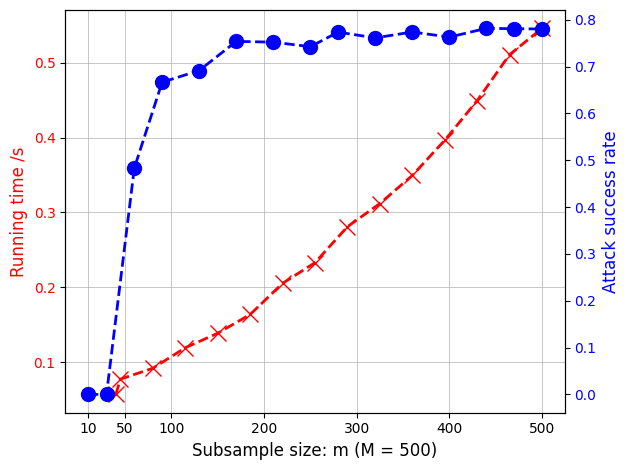

In [111]:
#stat

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()  # 创建一个figure和一个axes

x_values = [i*35+10 for i in range(15)]

x_values[0] = 40

x_values_success = [0, 2, 5, 8,12, 16, 20, 24, 27, 31, 35, 39, 43, 46, 49]





stat = stat_times

stat_coef = [i/10 for i in stat_coef_ori]

stat_coef = [stat_coef[i] for i in x_values_success]

x_values_success_modified = [i*10+10 for i in x_values_success]
# Generate some dummy data for 'multi' and 'stat' since it's not provided


marker_size = 11
# Plot lines with the new styles and markers
#ax.plot(x_values, ns, label='NS attack', color='green', linestyle='--', marker='*', linewidth=2,markersize=marker_size)
# ax.plot(x_values, multi, label='Multivariate attack', color='blue', linestyle='--', marker='o', linewidth=2,markersize=marker_size)
# ax.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2,markersize=marker_size)

# ax.plot(x_values_success,stat_nfound, label='Statistical attack Nfound', color='red', linestyle='--',  linewidth=2)

# 绘制第一条线，使用ax1，这将使用左边的y轴
ax1.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2, markersize=marker_size)
ax1.set_xlabel('X values')
ax1.set_ylabel('Statistical attack values', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# 使用twinx创建第二个axes，共享相同的x轴
ax2 = ax1.twinx()  
#ax2.plot(x_values_success, stat_nfound, label='Statistical attack Nfound', color='blue', linestyle='--', linewidth=2)
ax2.plot(x_values_success_modified, stat_coef, label='Secrets', color='blue', linestyle='--',marker='o', linewidth=2, markersize=marker_size-1)

ax2.set_ylabel('Attack success rate', color='blue',fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Add grid lines
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax1.set_xlabel('Subsample size: m (M = 500)', fontsize=12)
ax1.set_ylabel('Running time /s', fontsize=12)

# Set the legend to match the style in the second plot
#legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 合并图例句柄和标签
handles = handles1 + handles2
labels = labels1 + labels2

# 绘制统一的图例
#ax1.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, 0), frameon=True, fontsize=12)

# legend = ax1.legend(frameon=True, loc='right', fontsize=12)
# ax2.legend(frameon=True, loc='lower right', fontsize=12)
ax1.set_xticks([10, 50,100,200,300,400,500])
# Set the title if necessary
#ax.set_title('Running time as a function of m')

# Show the plot with tight layout to ensure the legend is placed correctly
plt.tight_layout()

# 保存为PDF格式
plt.savefig('running_time_successrate_stat.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('running_time_successrate_stat.png', bbox_inches='tight')

plt.show()


14


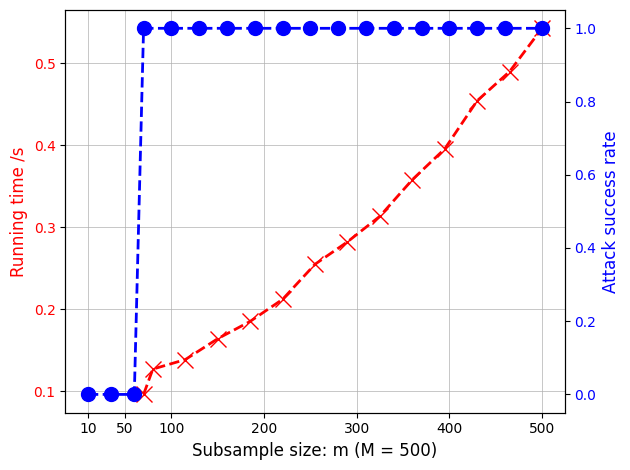

In [108]:
#multi

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()  # 创建一个figure和一个axes

x_values = [i*35+10 for i in range(15)]
x_values[1] = 70
x_values = x_values[1:]

x_values_success = [i*30+10 for i in range(17)]
x_values_success [1] = 35
x_values_success [2] = 60
x_values_success.insert(3, 70) 
x_values_success[-1] = 500 
multi_coef = [0 if i < 3 else 1 for i in range(18)]
ns = ns_times
multi = multi_times[1:]
stat = stat_times
# Generate some dummy data for 'multi' and 'stat' since it's not provided

print(len(multi))
marker_size = 11
# Plot lines with the new styles and markers
#ax.plot(x_values, ns, label='NS attack', color='green', linestyle='--', marker='*', linewidth=2,markersize=marker_size)
# ax.plot(x_values, multi, label='Multivariate attack', color='blue', linestyle='--', marker='o', linewidth=2,markersize=marker_size)
# ax.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2,markersize=marker_size)

# ax.plot(x_values_success,stat_nfound, label='Statistical attack Nfound', color='red', linestyle='--',  linewidth=2)

# 绘制第一条线，使用ax1，这将使用左边的y轴
ax1.plot(x_values, multi, label='Multivariate attack', color='red', linestyle='--', marker='x', linewidth=2, markersize=marker_size)
ax1.set_xlabel('X values')
ax1.set_ylabel('multi attack values', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# 使用twinx创建第二个axes，共享相同的x轴
ax2 = ax1.twinx()  
#ax2.plot(x_values_success, stat_nfound, label='Statistical attack Nfound', color='blue', linestyle='--', linewidth=2)
ax2.plot(x_values_success, multi_coef, label='Secrets', color='blue', linestyle='--',marker='o', linewidth=2, markersize=marker_size-1)

ax2.set_ylabel('Attack success rate', color='blue',fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Add grid lines
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax1.set_xlabel('Subsample size: m (M = 500)', fontsize=12)
ax1.set_ylabel('Running time /s', fontsize=12)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 合并图例句柄和标签
handles = handles1 + handles2
labels = labels1 + labels2

# 绘制统一的图例
#ax1.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, 0), frameon=True, fontsize=12)
# Set the legend to match the style in the second plot
#legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
# legend = ax1.legend(frameon=True, loc='right', fontsize=12)
# ax2.legend(frameon=True, loc='lower right', fontsize=12)
ax1.set_xticks([10, 50,100,200,300,400,500])
# Set the title if necessary
#ax.set_title('Running time as a function of m')

# Show the plot with tight layout to ensure the legend is placed correctly
plt.tight_layout()

# 保存为PDF格式
plt.savefig('running_time_successrate_multi.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('running_time_successrate_multi.png', bbox_inches='tight')

plt.show()


14


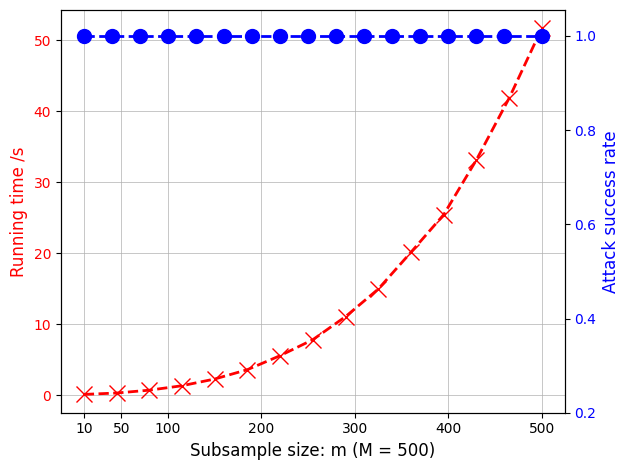

In [110]:
#ns

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()  # 创建一个figure和一个axes

x_values = [i*35+10 for i in range(15)]


x_values_success = [i*10 for i in range(1,51)]
ns_coef = [1 for i in range(17)]
ns = ns_times
x_values_success = [i*30+10 for i in range(17)]
x_values_success[-1] = 500
# Generate some dummy data for 'multi' and 'stat' since it's not provided


marker_size = 11
# Plot lines with the new styles and markers
#ax.plot(x_values, ns, label='NS attack', color='green', linestyle='--', marker='*', linewidth=2,markersize=marker_size)
# ax.plot(x_values, multi, label='Multivariate attack', color='blue', linestyle='--', marker='o', linewidth=2,markersize=marker_size)
# ax.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2,markersize=marker_size)

# ax.plot(x_values_success,stat_nfound, label='Statistical attack Nfound', color='red', linestyle='--',  linewidth=2)

# 绘制第一条线，使用ax1，这将使用左边的y轴
ax1.plot(x_values, ns, label='NS attack', color='red', linestyle='--', marker='x', linewidth=2, markersize=marker_size)
ax1.set_xlabel('X values')
ax1.set_ylabel('multi attack values', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# 使用twinx创建第二个axes，共享相同的x轴
ax2 = ax1.twinx()  
#ax2.plot(x_values_success, stat_nfound, label='Statistical attack Nfound', color='blue', linestyle='--', linewidth=2)
ax2.plot(x_values_success, ns_coef, label='Secrets', color='blue', linestyle='--',marker='o', linewidth=2, markersize=marker_size-1)

ax2.set_ylabel('Attack success rate', color='blue',fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Add grid lines
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax1.set_xlabel('Subsample size: m (M = 500)', fontsize=12)
ax1.set_ylabel('Running time /s', fontsize=12)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 合并图例句柄和标签
handles = handles1 + handles2
labels = labels1 + labels2

# 绘制统一的图例
#ax1.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, 0), frameon=True, fontsize=12)
# Set the legend to match the style in the second plot
#legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
# legend = ax1.legend(frameon=True, loc='right', fontsize=12)
# ax2.legend(frameon=True, loc='lower right', fontsize=12)
ax1.set_xticks([10,50,100,200,300,400,500])
ax2.set_yticks([0.2,0.4,0.6,0.8,1.0])
# Set the title if necessary
#ax.set_title('Running time as a function of m')

# Show the plot with tight layout to ensure the legend is placed correctly
plt.tight_layout()

# 保存为PDF格式
plt.savefig('running_time_successrate_ns.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('running_time_successrate_ns.png', bbox_inches='tight')

plt.show()


16


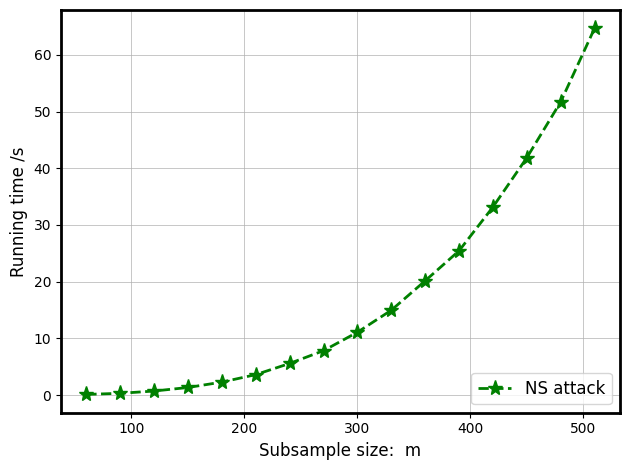

In [8]:
#ns

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_values = [i*30+60 for i in range(16)]
ns = ns_times
multi = multi_times
stat = stat_times
# Generate some dummy data for 'multi' and 'stat' since it's not provided

print(len(multi))
marker_size = 11
# Plot lines with the new styles and markers
#ax.plot(x_values, ns, label='NS attack', color='green', linestyle='--', marker='*', linewidth=2,markersize=marker_size)

ax.plot(x_values, multi, label='Multivariate attack', color='blue', linestyle='--', marker='o', linewidth=2,markersize=marker_size)
ax.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2,markersize=marker_size)

# Add grid lines
ax.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax.set_xlabel('Subsample size:  m', fontsize=12)
ax.set_ylabel('Running time /s', fontsize=12)

# Set the legend to match the style in the second plot
#legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
#legend = ax.legend(frameon=True, loc='lower right', fontsize=12)
# Set the title if necessary
#ax.set_title('Running time as a function of m')

# Show the plot with tight layout to ensure the legend is placed correctly
plt.tight_layout()

# 保存为PDF格式
plt.savefig('running_time_ns.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('running_time_ns.png', bbox_inches='tight')

plt.show()


NameError: name 'ns_times' is not defined

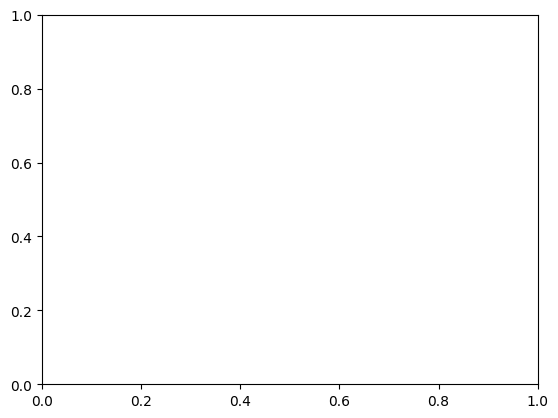

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_values = [i*30+60 for i in range(16)]
ns = ns_times
multi = multi_times
stat = stat_times
# Generate some dummy data for 'multi' and 'stat' since it's not provided

print(len(multi))

